# Importing Dependencies

In [1]:
import cv2  
import numpy as np
import os
from config import *
from util.synthetic_data_generator import Data_Generator
from util.model_generator import Model_Generator
from util.visualizer import *
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

# %run ./util/synthetic_data_generator.py
# %run ./util/visualizer.py
# %run config.py
# %run ./util/model_generator.py

## Generate Data

In [2]:
data_gen = Data_Generator(perc_circle_images=0.5, perc_mix_images=0, add_ellipse_images = False)
images, labels = data_gen.image_generator()

Total Images to be created is: 2000
Images with circle is: 1000
Images with mix shapes and circle is: 0
Creating Images...
Images created and saved in directory as below:-
d:\CompEng Materials\Application\Bosch_Grasbrunn


## Visualize the Images

### 1 represents presence of a circle in the image and vice-versa

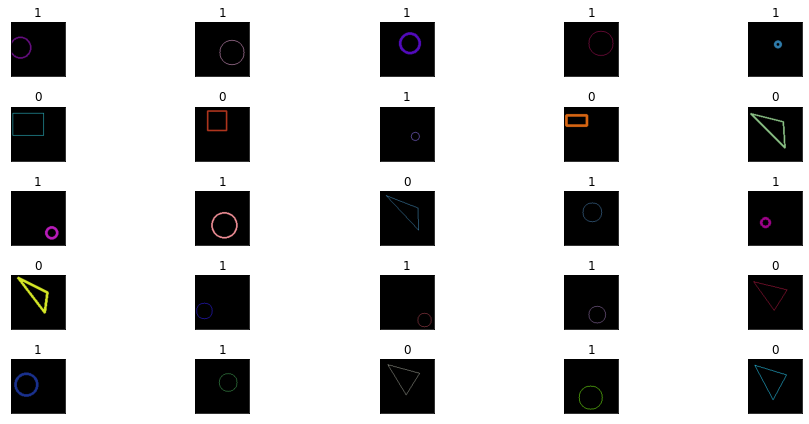

In [3]:
X_train, X_test, y_train, y_test = split_data(images, labels)

# number of images should be a multiple of 5
visualize_images(X_train, y_train, no_images=25)


## Simple Feed Forward Network

In [4]:
model_gen = Model_Generator('fnn')
model = model_gen.generate_model()

In [5]:
X_train_ffn = X_train.reshape(X_train.shape[0], -1)
X_test_ffn = X_test.reshape(X_test.shape[0], -1)

model.fit(X_train_ffn, y_train, epochs=model_config['no_epochs'], validation_data=(X_test_ffn, y_test), verbose=0, 
    batch_size=model_config['batch_size'])

### Visualize losses and accuracy

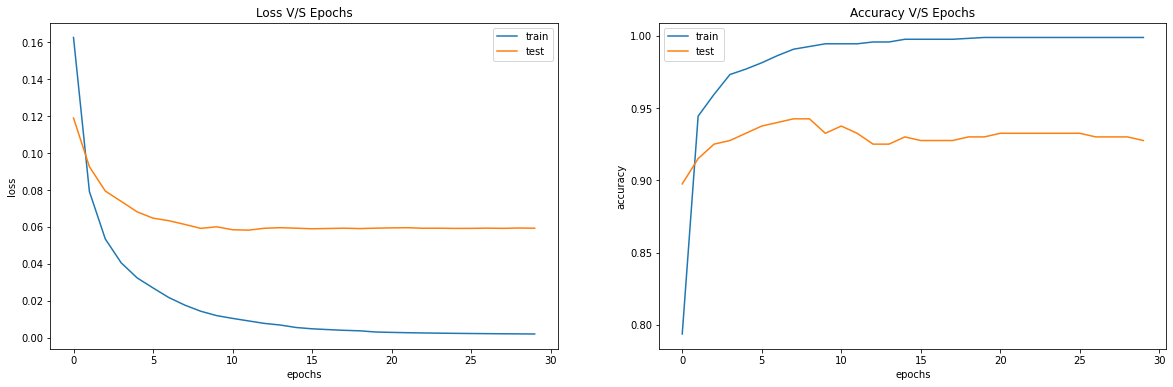

In [6]:
model_gen.plot_loss_and_acc(model)

### Visualize the prediction

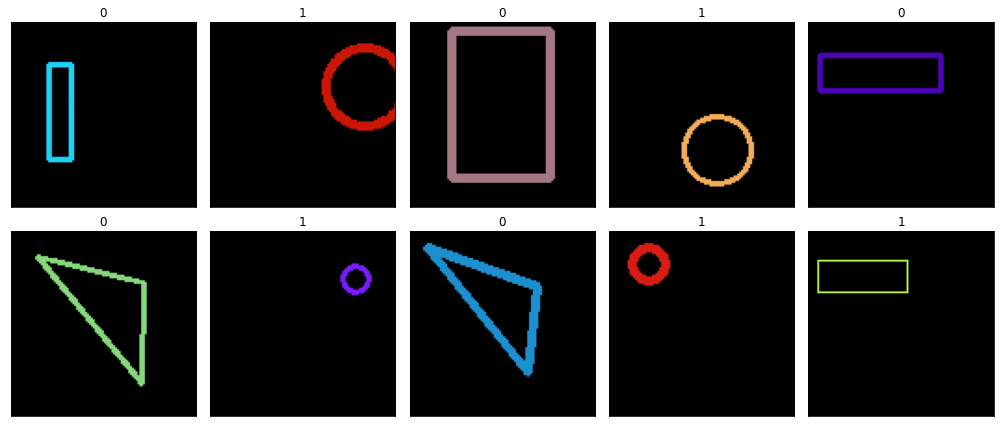

In [7]:
label_test = []
for y_pred in model.predict(X_test_ffn[0:10]): 
    if y_pred[0] > 0.5:
        label_test.append(1)
    else:
        label_test.append(0)
# number of images should be a multiple of 5
visualize_images(X_test, label_test, no_images=10)

## CNN model

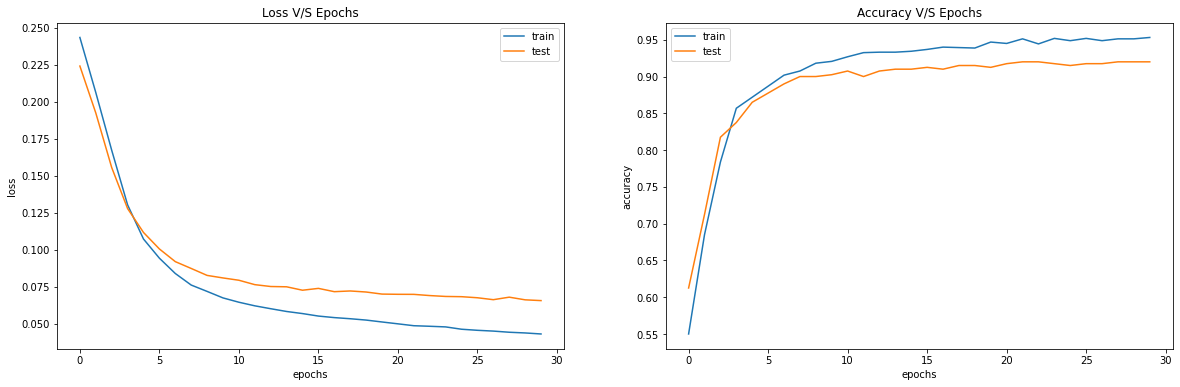

In [8]:
model_gen = Model_Generator('cnn')
model = model_gen.generate_model()

model.fit(X_train, y_train, epochs=model_config['no_epochs'], validation_data=(X_test, y_test), verbose=0, 
    batch_size=model_config['batch_size'])
model_gen.plot_loss_and_acc(model)

## Visualize the predictions

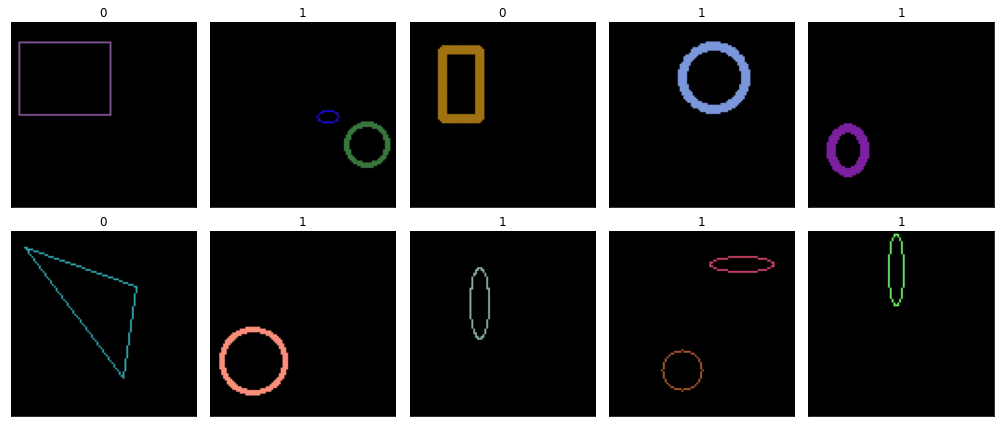

In [17]:
label_test = []
for y_pred in model.predict(X_test[0:10]): 
    if y_pred[0] > 0.5:
        label_test.append(1)
    else:
        label_test.append(0)
# number of images should be a multiple of 5
visualize_images(X_test, label_test, no_images=10)